In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import os
import seaborn as sns
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc={"axes.unicode_minus" : False })

In [2]:
df=pd.read_csv('./data/cctv_in_seoul.csv')
df1=df.copy()

In [3]:
df.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [ ]:
#2016증감=2016년-2015년
#증감=0보다 크거나 같으면 증가, 그렇지 않으면 감소
#구분=2016년 데이터에서 500보다 크면 상 300보다 크면 중 나머지는 하


In [5]:
df1['2016증감']=df1['2016년']-df1['2015년']

In [6]:
df1['증감'] = ['증가' if i>=0 else '감소' for i in df1['2016증감']]

In [7]:
df1.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감
0,강남구,3238,1292,430,584,932,348,증가
1,강동구,1010,379,99,155,377,222,증가
2,강북구,831,369,120,138,204,66,증가
3,강서구,911,388,258,184,81,-103,감소
4,관악구,2109,846,260,390,613,223,증가


In [8]:
df1['구분']=['상' if i>=500 else '중' if i>=300 else '하' for i in df1['2016년']]

In [9]:
df1.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구분
0,강남구,3238,1292,430,584,932,348,증가,상
1,강동구,1010,379,99,155,377,222,증가,중
2,강북구,831,369,120,138,204,66,증가,하
3,강서구,911,388,258,184,81,-103,감소,하
4,관악구,2109,846,260,390,613,223,증가,상


In [15]:
def max_o(x):
    mn,c,mx=x.quantile([0.25,0.5,0.75,])
    IRQ=mx-mn
    max_outlier=mx+(IRQ*1.5)
    return df1[x>=max_outlier]

In [17]:
max_o(df1['2015년'])

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구분
0,강남구,3238,1292,430,584,932,348,증가,상


In [11]:
print(mn)
print(c)
print(mx)

292.0
377.0
467.0


In [19]:
def max_o(s_df,x):
    mn,c,mx=s_df[x].quantile([0.25,0.5,0.75])
    IRQ=mx-mn
    max_outlier=mx+(IRQ*1.5)  
    return s_df[s_df[x]>=max_outlier]


In [20]:
max_o(df1,'2015년')

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구분
0,강남구,3238,1292,430,584,932,348,증가,상


In [30]:
def min_o(s_df,x):
    mn,c,mx=s_df[x].quantile([0.25,0.5,0.75])
    IRQ=mx-mn
    min_outlier=mn-(IRQ*1.5)  
    return s_df[s_df[x]<=min_outlier]


In [34]:
h=pd.read_csv('./data/house_price_clean.csv')

In [31]:
min_o(df1,'2016년')

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구분


In [27]:
df.sort_values('소계').reset_index()['소계']

0      825
1      831
2      878
3      911
4      916
5      980
6     1010
7     1023
8     1081
9     1254
10    1277
11    1302
12    1327
13    1348
14    1566
15    1619
16    1651
17    1870
18    1884
19    2096
20    2108
21    2109
22    2297
23    2482
24    3238
Name: 소계, dtype: int64

In [35]:
df1.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구분
0,강남구,3238,1292,430,584,932,348,증가,상
1,강동구,1010,379,99,155,377,222,증가,중
2,강북구,831,369,120,138,204,66,증가,하
3,강서구,911,388,258,184,81,-103,감소,하
4,관악구,2109,846,260,390,613,223,증가,상


In [40]:
df1.set_index('구분').unstack()

     구분
기관명  상     강남구
     중     강동구
     하     강북구
     하     강서구
     상     관악구
          ... 
증감   중      증가
     중      증가
     상      증가
     중      증가
     하      감소
Length: 200, dtype: object

In [41]:
h.head()

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488


In [43]:
h.dtypes

지역     object
규모     object
연도      int64
월       int64
분양가     int64
dtype: object

In [ ]:
h

In [45]:
h.groupby('지역').mean()[['분양가']]

,분양가
지역,
강원,2448.156863
경기,4133.952830
경남,2858.932367
경북,2570.465000
광주,3055.043750
대구,3679.620690
대전,3176.127389
부산,3691.981132
서울,7308.943396


In [59]:
h.groupby(['지역','규모']).mean().loc[['서울','강원']],['분양가']

(                           연도         월          분양가
 지역 규모                                               
 서울  102㎡초과        2017.452830  6.566038  7168.698113
     60㎡이하         2017.452830  6.566038  7078.547170
     60㎡초과 85㎡이하   2017.452830  6.566038  6932.622642
     85㎡초과 102㎡이하  2017.452830  6.566038  8055.905660
 강원  102㎡초과        2017.452830  6.566038  2575.056604
     60㎡이하         2017.452830  6.566038  2302.169811
     60㎡초과 85㎡이하   2017.452830  6.566038  2277.207547
     85㎡초과 102㎡이하  2017.711111  6.755556  2671.977778,
 ['분양가'])

In [60]:
h['분기']=['4분기' if i>=10 else '3분기' if i>=7 else '2분기' if i>=4 else '1분기' for i in h['월']]

<AxesSubplot:xlabel='분기'>

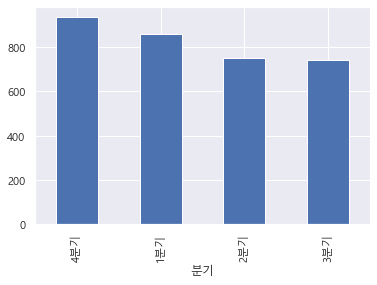

In [63]:
h.groupby('분기').count()['분양가'].sort_values(ascending=False).plot(kind='bar')

In [67]:
tmp=h.groupby(['지역','분기','규모']).mean().loc[['서울','경기','인천'],['분양가']]

In [68]:
tmp

분양가
지역 분기  규모                        
서울 1분기  102㎡초과        7211.357143
        60㎡이하         7117.142857
        60㎡초과 85㎡이하   6938.500000
        85㎡초과 102㎡이하  7873.714286
   2분기  102㎡초과        7062.500000
        60㎡이하         7122.083333
        60㎡초과 85㎡이하   6921.166667
        85㎡초과 102㎡이하  7789.000000
   3분기  102㎡초과        7118.416667
        60㎡이하         7098.583333
        60㎡초과 85㎡이하   7000.166667
        85㎡초과 102㎡이하  8498.750000
   4분기  102㎡초과        7254.066667
        60㎡이하         6991.666667
        60㎡초과 85㎡이하   6882.266667
        85㎡초과 102㎡이하  8085.200000
경기 1분기  102㎡초과        4522.571429
        60㎡이하         4044.000000
        60㎡초과 85㎡이하   3825.285714
        85㎡초과 102㎡이하  4209.428571
   2분기  102㎡초과        4510.250000
        60㎡이하         4037.916667
        60㎡초과 85㎡이하   3810.833333
        85㎡초과 102㎡이하  4106.750000
   3분기  102㎡초과        4552.333333
        60㎡이하         4152.250000
        60㎡초과 85㎡이하   3870.000000
        85㎡초과 102㎡이하  4263.916667
   4분기  102㎡초과        4407.466667
        60㎡이하         3964.600000
        60㎡초과 85㎡이하   3757.333333
        85㎡초과 102㎡이하  4159.200000
인천 1분기  102㎡초과        4368.285714
        60㎡이하         3464.142857
        60㎡초과 85㎡이하   3461.428571
        85㎡초과 102㎡이하  3537.857143
   2분기  102㎡초과        4473.909091
        60㎡이하         3421.583333
        60㎡초과 85㎡이하   3478.500000
        85㎡초과 102㎡이하  3490.333333
   3분기  102㎡초과        4504.111111
        60㎡이하         3378.500000
        60㎡초과 85㎡이하   3498.833333
        85㎡초과 102㎡이하  3467.666667
   4분기  102㎡초과        4256.866667
        60㎡이하         3435.533333
        60㎡초과 85㎡이하   3445.933333
        85㎡초과 102㎡이하  3536.066667

In [70]:
tmp.unstack(1)

분양가                                       
분기                        1분기          2분기          3분기          4분기
지역 규모                                                               
서울  102㎡초과        7211.357143  7062.500000  7118.416667  7254.066667
    60㎡이하         7117.142857  7122.083333  7098.583333  6991.666667
    60㎡초과 85㎡이하   6938.500000  6921.166667  7000.166667  6882.266667
    85㎡초과 102㎡이하  7873.714286  7789.000000  8498.750000  8085.200000
경기  102㎡초과        4522.571429  4510.250000  4552.333333  4407.466667
    60㎡이하         4044.000000  4037.916667  4152.250000  3964.600000
    60㎡초과 85㎡이하   3825.285714  3810.833333  3870.000000  3757.333333
    85㎡초과 102㎡이하  4209.428571  4106.750000  4263.916667  4159.200000
인천  102㎡초과        4368.285714  4473.909091  4504.111111  4256.866667
    60㎡이하         3464.142857  3421.583333  3378.500000  3435.533333
    60㎡초과 85㎡이하   3461.428571  3478.500000  3498.833333  3445.933333
    85㎡초과 102㎡이하  3537.857143  3490.333333  3467.666667  3536.066667

In [72]:
df1.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구분
0,강남구,3238,1292,430,584,932,348,증가,상
1,강동구,1010,379,99,155,377,222,증가,중
2,강북구,831,369,120,138,204,66,증가,하
3,강서구,911,388,258,184,81,-103,감소,하
4,관악구,2109,846,260,390,613,223,증가,상


In [74]:
df1=df1.set_index('기관명')

In [75]:
df1.head()

,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구분
기관명,,,,,,,,
강남구,3238,1292,430,584,932,348,증가,상
강동구,1010,379,99,155,377,222,증가,중
강북구,831,369,120,138,204,66,증가,하
강서구,911,388,258,184,81,-103,감소,하
관악구,2109,846,260,390,613,223,증가,상


<AxesSubplot:xlabel='기관명'>

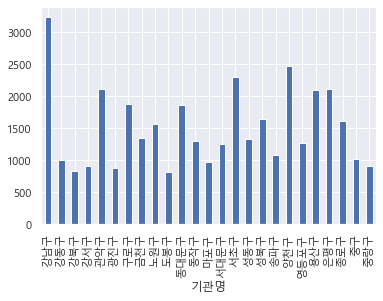

In [76]:
df1['소계'].plot(kind='bar')

In [77]:
df1.head()

,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구분
기관명,,,,,,,,
강남구,3238,1292,430,584,932,348,증가,상
강동구,1010,379,99,155,377,222,증가,중
강북구,831,369,120,138,204,66,증가,하
강서구,911,388,258,184,81,-103,감소,하
관악구,2109,846,260,390,613,223,증가,상


<AxesSubplot:ylabel='기관명'>

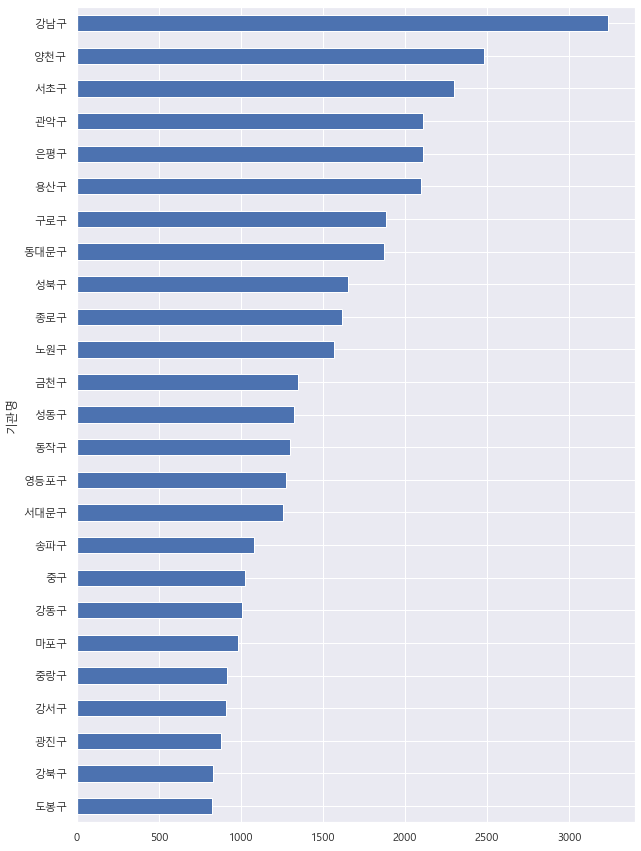

In [80]:
df1.sort_values('소계')['소계'].plot(kind='barh',figsize=(10,15))

In [83]:
h.groupby('분기').agg(['sum','mean','count','max','min'])[['분양가']]

C:\Users\user\AppData\Local\Temp\ipykernel_14916\403701835.py:1: FutureWarning: ['지역', '규모'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  h.groupby('분기').agg(['sum','mean','count','max','min'])[['분양가']]


분양가                                
         sum         mean count    max   min
분기                                          
1분기  2835981  3293.822300   861  13835  1906
2분기  2467032  3280.627660   752  12728  1900
3분기  2480452  3333.940860   744  12728  1924
4분기  3063898  3273.395299   936  12728  1868